In [2]:
import numpy as np
import cv2


In [18]:

# Load an color image in grayscale
img = cv2.imread('rgb.jpg',1)

In [14]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
cv2.imwrite('messigray.png',img)


True

In [23]:
import numpy as np
import cv2
img = cv2.imread('rgb.jpg',1)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()


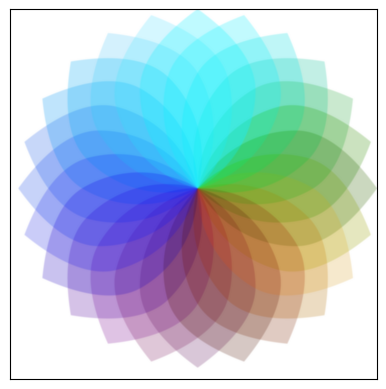

In [32]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('rgb.jpg',1)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()